In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n=8
lambdalist=[0.25,0.5,0.75,1]
ite =100000
alpha=0.05
error=[]
error_test=[]
for lamb in lambdalist:
    data = pd.read_csv('train.csv')
    X1 = data.iloc[:,0:1]
    Y = data.iloc[:,1:2].values

    data_pred = pd.read_csv('test.csv')
    X_test1 = data_pred.iloc[:,0:1]
    Y_test = data_pred.iloc[:,1:2].values

    X = np.ones([1000,1])
    for i in range (1,n+1):
        dummy = np.power(X1,i)
        X = np.concatenate((X,dummy),axis=1)

    X_test = np.ones([200,1])
    for i in range (1,n+1):
        dummy = np.power(X_test1,i)
        X_test = np.concatenate((X_test,dummy),axis=1)

    X_test = (X_test - X.mean())/X.max()
    X = (X - X.mean())/X.max()

    theta=np.zeros([n+1,1])

    def costfunction(X,theta,Y):
        Z=X.dot(theta)
        Z=Z-Y
        Z=Z*Z
        cost= np.sum(Z)/(2*(X.shape[0]))
        W=np.sum(theta*theta)
        W=lamb*W/(2*(X.shape[0]))
        cost = cost+W 
        return cost

    def grad_des(X,theta,iteration,Y):
        cost = np.zeros(iteration)
        for i in range (iteration):
            theta = theta*(1-((lamb*alpha)/X.shape[0])) -(alpha)*((X.T).dot((X.dot(theta)-Y)))/(X.shape[0])
            cost[i] = costfunction(X,theta,Y)
        return theta,cost

    theta,cost=grad_des(X,theta,ite,Y)

    Y_pred=X_test.dot(theta)
    error.append(costfunction(X,theta,Y))
    error_test.append(costfunction(X_test,theta,Y_test))

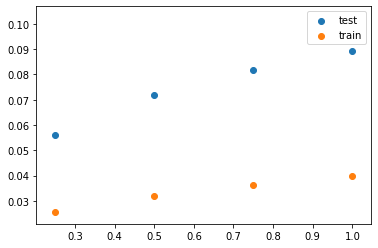

In [2]:
plt.scatter([0.25,0.5,0.75,1],error_test,label="test")
plt.scatter([0.25,0.5,0.75,1],error,label="train")
plt.legend()

In [3]:
error

[0.025774460729147818,
 0.03213858133986669,
 0.03639420548613521,
 0.0397127179183564]